Trains a Neural Network using the Data-Generator.

In [26]:
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from datagenerator import DataGenerator
import datetime

# Hyper-parameters.

In [2]:
if os.path.exists("datasetpath.txt"):
    dataset_path = open("datasetpath.txt", "r").read().replace("\n", "")
else:
    dataset_path = "../data"

#input_type = "image"
#input_type = "voxelgrid"
input_type = "pointcloud"
train_size = 500
validate_size = 100

# Instantiate the data-generator.

In [3]:
data_generator = DataGenerator(dataset_path=dataset_path, input_type=input_type, output_targets=["height", "weight"])

print("jpg_paths", len(data_generator.jpg_paths))
print("pcd_paths", len(data_generator.pcd_paths))
print("json_paths_personal", len(data_generator.json_paths_personal))
print("json_paths_measures", len(data_generator.json_paths_measures))
print("QR-Codes:\n" + "\n".join(data_generator.qrcodes))

print("Done.")

jpg_paths 4511
pcd_paths 1360
json_paths_personal 40
json_paths_measures 74
QR-Codes:
SAM-02-003-01
SAM-GOV-001
SAM-GOV-002
SAM-GOV-003
SAM-GOV-004
SAM-GOV-005
SAM-GOV-008
SAM-GOV-011
SAM-GOV-012
SAM-GOV-013
SAM-GOV-014
SAM-GOV-023
SAM-GOV-025
SAM-GOV-026
SAM-GOV-033
SAM-GOV-034
SAM-GOV-035
SAM-GOV-036
SAM-GOV-037
SAM-GOV-038
SAM-GOV-041
SAM-GOV-042
SAM-GOV-043
SAM-GOV-044
SAM-GOV-099
SAM-SNG-011
SAM-SNG-012
SAM-SNG-013
SAM-SNG-014
SAM-SNG-015
SAM-SNG-016
SAM-SNG-021
SAM-SNG-036
SAM-SNG-066
SAM-SNG-067
SAM-SNG-072
SAM-SNG-091
SAM-SNG-096
Done.


#  Do the training-validation-split on QR-codes.

In [ ]:
qrcodes_shuffle = list(data_generator.qrcodes)
qrcodes_shuffle = [qrcode for qrcode in qrcodes_shuffle if qrcode.startswith("SAM-GOV")]
random.shuffle(qrcodes_shuffle)
split_index = int(0.8 * len(qrcodes_shuffle))
qrcodes_train = qrcodes_shuffle[:split_index]
qrcodes_validate = qrcodes_shuffle[split_index:]

print("QR-Codes train:")
print(" ".join(qrcodes_train))
print("")

print("QR-Codes validate:")
print(" ".join(qrcodes_validate))
print("")

print("Done.")

# Do a plausibility check on training-data.

In [ ]:
# TODO

# Create a net.

In [5]:
input_shape = data_generator.input_shape
output_size = data_generator.output_size

model = models.Sequential()

model.add(layers.Flatten(input_shape=input_shape))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(output_size))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 128000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16384128  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 16,392,514
Trainable params: 16,392,514
Non-trainable params: 0
_________________________________________________________________


# Train the net.

In [6]:
history = model.fit_generator(
    data_generator.generate(size=32, qrcodes_to_use=qrcodes_train),
    steps_per_epoch=32,
    epochs=100,
    validation_data=data_generator.generate(size=32, qrcodes_to_use=qrcodes_validate),
    validation_steps=8
)

Epoch 1/100
24/32 [=====================>........] - ETA: 49s - loss: 12436.6419 - mean_absolute_error: 40.6704../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
31/32 [============================>.] - ETA: 5s - loss: 9731.5777 - mean_absolute_error: 35.9884  ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
32/32 [==============================] - 250s 8s/step - loss: 9434.4228 - mean_absolute_error: 35.2861 - val_loss: 293.9261 - val_mean_absolute_error: 14.8873
Epoch 2/100
14/32 [============>.................] - ETA: 13s - loss: 416.2271 - mean_absolute_error: 18.0372../data/storage/person/SAM-GOV-034/measurements/1530607630242/

31/32 [============================>.] - ETA: 0s - loss: 63.7685 - mean_absolute_error: 5.0791../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd (31790, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd
32/32 [==============================] - 8s 236ms/step - loss: 62.3192 - mean_absolute_error: 5.0249 - val_loss: 44.4234 - val_mean_absolute_error: 5.1094
Epoch 11/100
20/32 [=================>............] - ETA: 2s - loss: 57.6504 - mean_absolute_error: 5.4273../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
32/32 [==============================] - 6s 199ms/step - loss: 63.0571 - mean_absolute_error: 5.7496 - val_loss: 115.6052 - val_mean_absolute_error: 7.8856
Epoch 12/100
 5/32 [===>....

32/32 [==============================] - 6s 195ms/step - loss: 39.5104 - mean_absolute_error: 4.6205 - val_loss: 18.5931 - val_mean_absolute_error: 3.3513
Epoch 21/100
 9/32 [=======>......................] - ETA: 4s - loss: 36.6699 - mean_absolute_error: 3.8464../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
26/32 [=======================>......] - ETA: 1s - loss: 37.5298 - mean_absolute_error: 4.2669../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
29/32 [==========================>...] - ETA: 0s - loss: 36.3870 - mean_absolute_error: 4.2087../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630

32/32 [==============================] - 7s 212ms/step - loss: 28.5242 - mean_absolute_error: 3.6979 - val_loss: 77.3626 - val_mean_absolute_error: 6.2811
Epoch 30/100
 9/32 [=======>......................] - ETA: 4s - loss: 39.6633 - mean_absolute_error: 4.5379../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
31/32 [============================>.] - ETA: 0s - loss: 28.5998 - mean_absolute_error: 3.6836../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd (31790, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd
32/32 [==============================] - 7s 209ms/step - loss: 29.1280 - mean_absolute_error: 3.7190 - val_loss: 19.8465 - val_mean_absolute_error: 3.3266
Epoch 31/100
22/32 [=========

18/32 [===============>..............] - ETA: 2s - loss: 23.2406 - mean_absolute_error: 3.1618../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
32/32 [==============================] - 7s 204ms/step - loss: 23.7962 - mean_absolute_error: 3.2898 - val_loss: 87.7955 - val_mean_absolute_error: 6.8797
Epoch 37/100
16/32 [==============>...............] - ETA: 3s - loss: 28.6029 - mean_absolute_error: 3.7322../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
28/32 [=========================>....] - ETA: 0s - loss: 26.0400 - mean_absolute_error: 3.5673../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630

14/32 [============>.................] - ETA: 3s - loss: 26.4418 - mean_absolute_error: 3.7016../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd (31790, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd
29/32 [==========================>...] - ETA: 0s - loss: 24.4520 - mean_absolute_error: 3.5290../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
32/32 [==============================] - 7s 223ms/step - loss: 23.1477 - mean_absolute_error: 3.4217 - val_loss: 87.7916 - val_mean_absolute_error: 6.6396
Epoch 45/100
 8/32 [======>.......................] - ETA: 4s - loss: 36.1109 - mean_absolute_error: 4.3384../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630

28/32 [=========================>....] - ETA: 0s - loss: 25.8556 - mean_absolute_error: 3.6645../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
31/32 [============================>.] - ETA: 0s - loss: 25.1680 - mean_absolute_error: 3.6176../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
32/32 [==============================] - 7s 206ms/step - loss: 24.8684 - mean_absolute_error: 3.5991 - val_loss: 18.4262 - val_mean_absolute_error: 3.1054
Epoch 53/100
18/32 [===============>..............] - ETA: 2s - loss: 26.7917 - mean_absolute_error: 3.3253../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630

32/32 [==============================] - 6s 203ms/step - loss: 24.9810 - mean_absolute_error: 3.5565 - val_loss: 44.5029 - val_mean_absolute_error: 4.6311
Epoch 64/100
 3/32 [=>............................] - ETA: 5s - loss: 8.1038 - mean_absolute_error: 2.2388../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd (31790, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd
32/32 [==============================] - 7s 211ms/step - loss: 22.9497 - mean_absolute_error: 3.4461 - val_loss: 16.4706 - val_mean_absolute_error: 3.1918
Epoch 65/100
23/32 [====================>.........] - ETA: 1s - loss: 21.3666 - mean_absolute_error: 3.3419../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
32/32 [==========

28/32 [=========================>....] - ETA: 0s - loss: 22.6352 - mean_absolute_error: 3.3130../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
31/32 [============================>.] - ETA: 0s - loss: 21.9845 - mean_absolute_error: 3.2628../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
32/32 [==============================] - 7s 214ms/step - loss: 22.0128 - mean_absolute_error: 3.2723 - val_loss: 19.2433 - val_mean_absolute_error: 3.6039
Epoch 72/100
 6/32 [====>.........................] - ETA: 5s - loss: 22.7444 - mean_absolute_error: 3.6563../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630

28/32 [=========================>....] - ETA: 0s - loss: 19.2893 - mean_absolute_error: 3.2089../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
31/32 [============================>.] - ETA: 0s - loss: 20.8768 - mean_absolute_error: 3.3363../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
32/32 [==============================] - 6s 197ms/step - loss: 21.9201 - mean_absolute_error: 3.4035 - val_loss: 14.5967 - val_mean_absolute_error: 2.9132
Epoch 79/100
13/32 [===========>..................] - ETA: 3s - loss: 20.6487 - mean_absolute_error: 3.1848../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630

26/32 [=======================>......] - ETA: 1s - loss: 21.7273 - mean_absolute_error: 3.3832../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd (31611, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_029.pcd
32/32 [==============================] - 8s 250ms/step - loss: 19.5027 - mean_absolute_error: 3.1746 - val_loss: 39.8446 - val_mean_absolute_error: 4.4267
Epoch 87/100
21/32 [==================>...........] - ETA: 2s - loss: 17.5863 - mean_absolute_error: 2.8664../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd (31790, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_031.pcd
32/32 [==============================] - 7s 227ms/step - loss: 18.8067 - mean_absolute_error: 3.0038 - val_loss: 44.7600 - val_mean_absolute_error: 4.8517
Epoch 88/100
25/32 [=========

32/32 [==============================] - 7s 205ms/step - loss: 22.2838 - mean_absolute_error: 3.4877 - val_loss: 16.0728 - val_mean_absolute_error: 3.2101
Epoch 93/100
16/32 [==============>...............] - ETA: 3s - loss: 18.5284 - mean_absolute_error: 3.2513../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
32/32 [==============================] - 6s 197ms/step - loss: 16.7173 - mean_absolute_error: 3.0239 - val_loss: 100.7242 - val_mean_absolute_error: 7.7339
Epoch 94/100
 5/32 [===>..........................] - ETA: 5s - loss: 45.5987 - mean_absolute_error: 4.9187../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
 8/32 [======>.

30/32 [===========================>..] - ETA: 0s - loss: 20.8574 - mean_absolute_error: 3.2353../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd (31510, 4)
Error: ../data/storage/person/SAM-GOV-034/measurements/1530607630242/pc/pc_SAM-GOV-034_1530607630242_107_030.pcd
32/32 [==============================] - 6s 197ms/step - loss: 20.9137 - mean_absolute_error: 3.2342 - val_loss: 77.8464 - val_mean_absolute_error: 6.5677


# Visualize results.

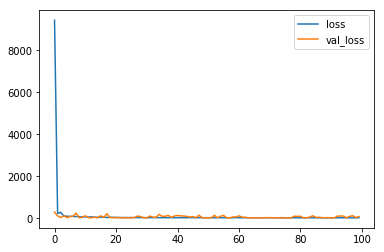

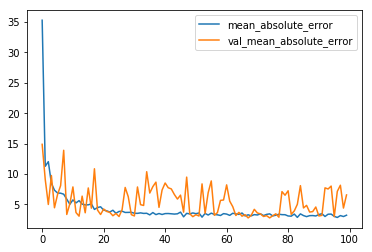

In [7]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["mean_absolute_error"], label="mean_absolute_error")
plt.plot(history.history["val_mean_absolute_error"], label="val_mean_absolute_error")
plt.legend()
plt.show()
plt.close()

# Save model.

In [29]:
datetime_string = datetime.datetime.now().strftime("%Y%m%d-%H%M")
model_name = datetime_string + ".h5"
model_path = os.path.join(model_name)
model.save(model_path)

# Test the model.

32/32 [==============================] - 0s 852us/step
Loss: 87.76235961914062
Metric: 7.164137840270996



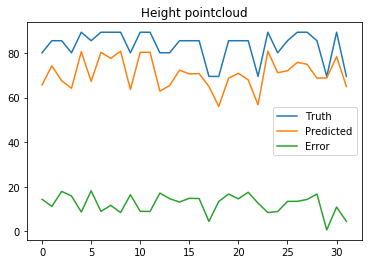

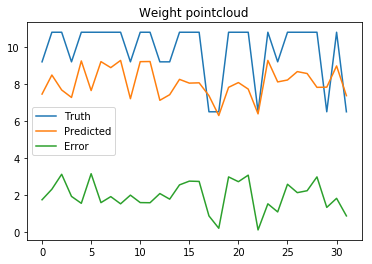

In [33]:
# Generate some data.
x_input, y_output = next(data_generator.generate(size=32, qrcodes_to_use=qrcodes_validate))

# Evaluate.
loss, metric = model.evaluate(x_input, y_output)
print("Loss:", loss)
print("Metric:", metric)
print("")

# Do prediction and compare.
y_output_pred = model.predict(x_input)
#for y_true, y_pred in zip(y_output, y_output_pred):
    #print(y_true, y_pred, y_true - y_pred)
    
plt.plot(y_output[:,0], label="Truth")
plt.plot(y_output_pred[:,0], label="Predicted")
plt.plot(np.abs(y_output_pred - y_output)[:,0], label="Error")
plt.title("Height " + input_type)
plt.legend()
plt.savefig(datetime_string + "-" + input_type + "-height.jpg")
plt.show()
plt.close()

plt.plot(y_output[:,1], label="Truth")
plt.plot(y_output_pred[:,1], label="Predicted")
plt.plot(np.abs(y_output_pred - y_output)[:,1], label="Error")
plt.title("Weight " + input_type)
plt.legend()
plt.savefig(datetime_string + "-" + input_type + "-weight.jpg")
plt.show()
plt.close()